# Import Library

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

# Load the dataset

In [4]:
df = pd.read_excel('/content/DS - Assignment Part 1 data set.xlsx')

In [5]:
df.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


We could see that the feature names are too big, so lets make it short (rename them) to use it with ease.

In [6]:
df.rename(
    columns={
        "Transaction date": "Transaction_Date", 
        "House Age": "House_Age", 
        "Distance from nearest Metro station (km)": "Distance",
        "Number of convenience stores": "Num_Stores_NearBy",
        "latitude": "Latitude",
        "longitude": "Longitude",
        "House price of unit area": "Target",
    },
    inplace = True
)

In [7]:
df.shape

(414, 9)

So there are 414 data points and 7 columns (6 Features and 1 Target)

In [8]:
df.describe()

,Transaction_Date,House_Age,Distance,Num_Stores_NearBy,Latitude,Longitude,Number of bedrooms,House size (sqft),Target
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,1.987923,931.475845,37.980193
std,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,0.818875,348.910269,13.606488
min,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,1.000000,402.000000,7.600000
25%,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,1.000000,548.000000,27.700000
50%,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,2.000000,975.000000,38.450000
75%,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,3.000000,1234.750000,46.600000
max,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,3.000000,1500.000000,117.500000


Lets get the correlation of the features w.r.t the target.

In [9]:
df.corr()

,Transaction_Date,House_Age,Distance,Num_Stores_NearBy,Latitude,Longitude,Number of bedrooms,House size (sqft),Target
Transaction_Date,1.000000,0.017542,0.060880,0.009544,0.035016,-0.041065,0.061985,0.068405,0.087529
House_Age,0.017542,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.008756,-0.060361,-0.210567
Distance,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.046856,0.001795,-0.673613
Num_Stores_NearBy,0.009544,0.049593,-0.602519,1.000000,0.444143,0.449099,0.043638,0.033286,0.571005
Latitude,0.035016,0.054420,-0.591067,0.444143,1.000000,0.412924,0.043921,0.031696,0.546307
Longitude,-0.041065,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.041680,0.009322,0.523287
Number of bedrooms,0.061985,-0.008756,-0.046856,0.043638,0.043921,0.041680,1.000000,0.752276,0.050265
House size (sqft),0.068405,-0.060361,0.001795,0.033286,0.031696,0.009322,0.752276,1.000000,0.046489
Target,0.087529,-0.210567,-0.673613,0.571005,0.546307,0.523287,0.050265,0.046489,1.000000


Just sort the correlation of each feature w.r.t the target. Will select the top correlated feature which is `DIstance` with 67% correlated.

And will use this single feature to work with SVR.

In [10]:
abs(df.corr())['Target'].sort_values(ascending=False)

Target                1.000000
Distance              0.673613
Num_Stores_NearBy     0.571005
Latitude              0.546307
Longitude             0.523287
House_Age             0.210567
Transaction_Date      0.087529
Number of bedrooms    0.050265
House size (sqft)     0.046489
Name: Target, dtype: float64

Scatter plot with one predictor (feature) w.r.t target.

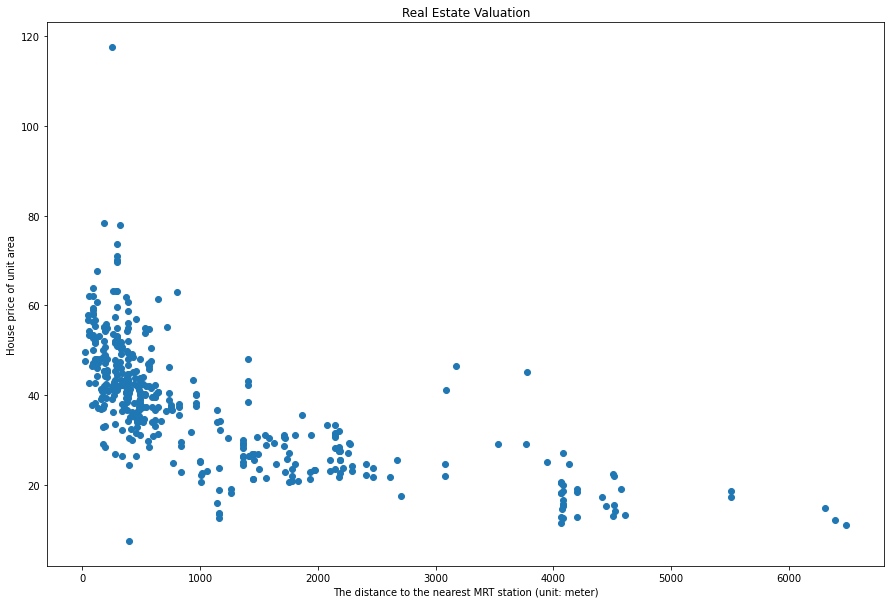

In [11]:
plt.figure(figsize=(15,10))
plt.scatter(x=df['Distance'], y=df['Target'])
plt.xlabel('The distance to the nearest MRT station (unit: meter)')
plt.ylabel('House price of unit area')
plt.title('Real Estate Valuation')
plt.show()

# Split the data into Training and Validation set

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X = np.array(df['Distance']).reshape(-1,1)
y = np.array(df['Target']).reshape(-1,1)

In [14]:
X[1]

array([306.5947])

In [15]:
y[1]

array([42.2])

In [16]:
len(X), len(y)

(414, 414)

In [17]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=99)

y_train = y_train.reshape(len(y_train),)
y_valid = y_valid.reshape(len(y_valid),)

X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((331, 1), (83, 1), (331,), (83,))

In [18]:
X_train[1:3]

array([[967.4   ],
       [187.4823]])

In [19]:
y_train[1:3]

array([40.3, 33.1])

# Scaling
From the data description we know that the units for each feature is different, so lets scale it to one common unit.

In [20]:
from sklearn.preprocessing import StandardScaler
# Standardisation replaces the values by their Z scores.

# Initialise the Scaler 
scaler = StandardScaler() 
  
# To scale data 
X_train_Scaled = scaler.fit_transform(X_train) 
# y_train_Scaled = scaler.fit_transform(y_train) 

X_valid_Scaled = scaler.transform(X_valid) 
# y_valid_Scaled = scaler.transform(y_valid) 

In [21]:
X_train_Scaled[1]

array([-0.0924274])

# Linear Regression

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

Intercept: 45.753
Coefficient: -0.007
MAE = 7,488.22


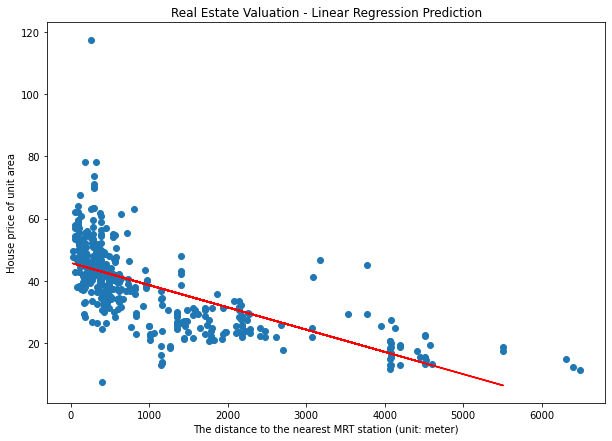

In [24]:
from sklearn.metrics import mean_absolute_error 

print("Intercept: {:,.3f}".format(lr.intercept_))
print("Coefficient: {:,.3f}".format(lr.coef_[0]))
    
mae = mean_absolute_error(y_valid, lr.predict(X_valid))
print("MAE = {:,.2f}".format(1000*mae))

# Plot outputs
plt.figure(figsize=(10,7))
plt.scatter(x=df['Distance'], y=df['Target'])
plt.plot(X_valid, lr.predict(X_valid), color='red')
plt.xlabel('The distance to the nearest MRT station (unit: meter)')
plt.ylabel('House price of unit area')
plt.title('Real Estate Valuation - Linear Regression Prediction')

plt.show()

# SVR


In [25]:
def svr_results(X_valid, y_valid, model, title):
    
    print("C: {}".format(model.C))
    print("Epsilon: {}".format(model.epsilon))
    
    print("Intercept: {:,.3f}".format(model.intercept_[0]))
    print("Coefficient: {:,.3f}".format(model.coef_[0]))
    
    mae = mean_absolute_error(y_valid, model.predict(X_valid))
    print("MAE = {:,.2f}".format(1000*mae))
    
    perc_within_eps = 100*np.sum(y_valid - model.predict(X_valid) < eps) / len(y_valid)
    print("Percentage within Epsilon = {:,.2f}%".format(perc_within_eps))
    
    # Plot outputs
    plt.figure(figsize=(10,7))
    plt.scatter(x=df['Distance'], y=df['Target'])
    plt.plot(X_valid, model.predict(X_valid), color='red')
    plt.plot(X_valid, model.predict(X_valid)-eps, color='black')
    plt.plot(X_valid, model.predict(X_valid)+eps, color='black')
    plt.xlabel('The distance to the nearest MRT station (unit: meter)')
    plt.ylabel('house price of unit area')
    plt.title(title)
    plt.show()

## Simple LinearSVR

In [26]:
from sklearn.svm import LinearSVR

In [27]:
eps = 5
l_svr = LinearSVR(epsilon=eps, C=0.01, fit_intercept=True)

C: 0.01
Epsilon: 5
Intercept: 1.912
Coefficient: 0.018
MAE = 32,477.17
Percentage within Epsilon = 32.53%


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


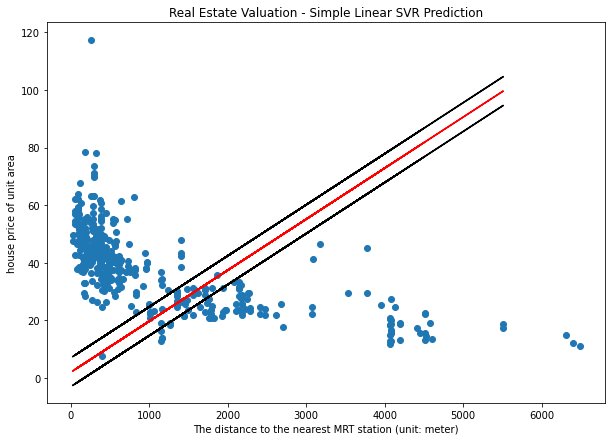

In [28]:
l_svr.fit(X_train, y_train)

svr_results(X_valid, y_valid, l_svr, 'Real Estate Valuation - Simple Linear SVR Prediction')

## Simple LinearSVR with Larger Penalty (C = 1.0)

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


C: 1.0
Epsilon: 5
Intercept: 35.324
Coefficient: -0.003
MAE = 10,027.15
Percentage within Epsilon = 50.60%


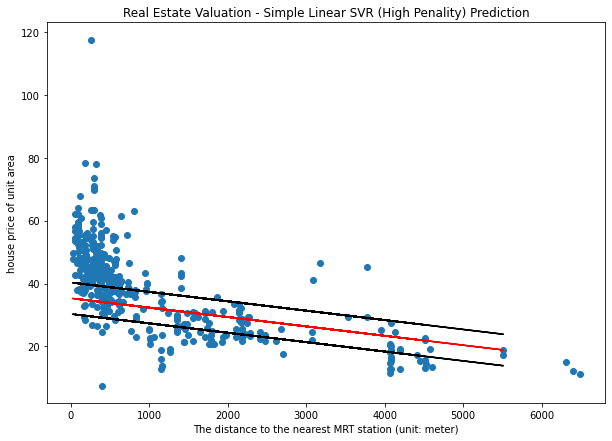

In [29]:
eps = 5
lsvr_high_C = LinearSVR(epsilon=eps, C=1.0, fit_intercept=True)

lsvr_high_C.fit(X_train, y_train)

svr_results(X_valid, y_valid, lsvr_high_C, 'Real Estate Valuation - Simple Linear SVR (High Penality) Prediction')


## Use Grid Search 

In [30]:
from sklearn.model_selection import GridSearchCV

In [31]:
grid = {
    'C': np.linspace(0.01, 10),
    'epsilon': np.linspace(0.01, 10)
}
    
svr_gridsearch =  LinearSVR(fit_intercept=True, max_iter=10000)
# svr_gridsearch =  LinearSVR(fit_intercept=True, max_iter=100000)

grid_svr = GridSearchCV(svr_gridsearch, grid, scoring='neg_mean_absolute_error', cv=5)



In [32]:
grid_svr.fit(X_train, y_train)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to con

GridSearchCV(cv=5, estimator=LinearSVR(max_iter=10000),
             param_grid={'C': array([ 0.01      ,  0.21387755,  0.4177551 ,  0.62163265,  0.8255102 ,
        1.02938776,  1.23326531,  1.43714286,  1.64102041,  1.84489796,
        2.04877551,  2.25265306,  2.45653061,  2.66040816,  2.86428571,
        3.06816327,  3.27204082,  3.47591837,  3.67979592,  3.88367347,
        4.08755102,  4.29142857,  4.49530612,  4.69918367,  4.90306122,
        5.1069...
        4.08755102,  4.29142857,  4.49530612,  4.69918367,  4.90306122,
        5.10693878,  5.31081633,  5.51469388,  5.71857143,  5.92244898,
        6.12632653,  6.33020408,  6.53408163,  6.73795918,  6.94183673,
        7.14571429,  7.34959184,  7.55346939,  7.75734694,  7.96122449,
        8.16510204,  8.36897959,  8.57285714,  8.77673469,  8.98061224,
        9.1844898 ,  9.38836735,  9.5922449 ,  9.79612245, 10.        ])},
             scoring='neg_mean_absolute_error')

In-case if you have warning ""
https://stackoverflow.com/questions/52670012/convergencewarning-liblinear-failed-to-converge-increase-the-number-of-iterati 

In [33]:
best_grid_svr_mae = grid_svr.best_estimator_
best_grid_svr_mae.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVR(C=1.437142857142857, epsilon=3.679795918367347, max_iter=10000)

C: 1.437142857142857
Epsilon: 3.679795918367347
Intercept: 44.914
Coefficient: -0.009
MAE = 7,659.85
Percentage within Epsilon = 65.06%


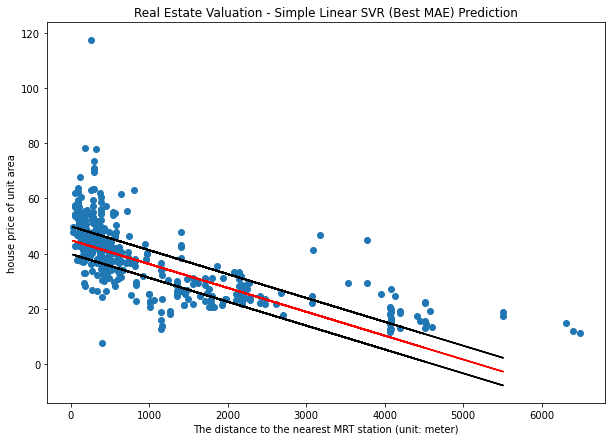

In [34]:
svr_results(X_valid, y_valid, best_grid_svr_mae, 'Real Estate Valuation - Simple Linear SVR (Best MAE) Prediction')

## Some Other model

In [36]:
import seaborn as sns

In [41]:
def run_model(model, X_train, y_train, X_test, y_test):
  model.fit(X_train,y_train)
  preds = model.predict(X_test)
  rmse = mean_absolute_error(y_test,preds)
  mae = mean_absolute_error(y_test,preds)
  print(f'MAE: {mae}')
  print(f'RMSE: {rmse}')

Polynomial Regressor

In [53]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
pipe = make_pipeline(PolynomialFeatures(degree = 3), LinearRegression())
run_model(pipe,X_train,y_train,X_valid,y_valid)


MAE: 6.494534784765277
RMSE: 6.494534784765277


KNeighborsRegressor

In [43]:
from sklearn.neighbors import KNeighborsRegressor
k_values = [1,5,10,30]
for n in k_values:
  model = KNeighborsRegressor(n_neighbors = n)
  run_model(model, X_train, y_train, X_valid,y_valid)

MAE: 5.666265060240964
RMSE: 5.666265060240964
MAE: 5.978554216867471
RMSE: 5.978554216867471
MAE: 6.369277108433734
RMSE: 6.369277108433734
MAE: 6.269598393574299
RMSE: 6.269598393574299


DecisionTreeRegressor

In [44]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
run_model(model, X_train, y_train, X_valid,y_valid)

MAE: 5.463629974443226
RMSE: 5.463629974443226
